# Optimize clustering into playlists with 5000 songs

# Import libraries and data

In [ ]:
# import sys
# !{sys.executable} -m pip install nbformat

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# This will ensure the outputs of the .transform() method are pandas data frames
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
songs = pd.read_csv("../data/3_spotify_5000_songs.csv")
songs.columns = songs.columns.str.strip()
songs = songs.set_index(["name", "artist"])
songs_df = songs.drop(columns=["id", "html",  "type", "Unnamed: 0"])
#"time_signature", "duration_ms","tempo", "mode", "key", "loudness",
songs_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4


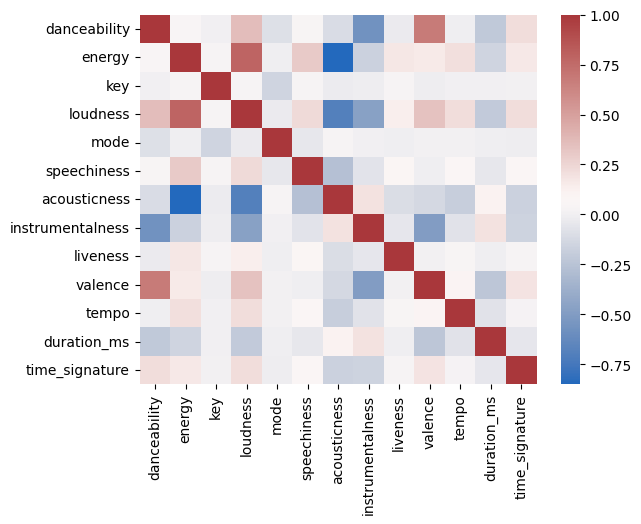

In [3]:
# calculate the correlation matrix on the numeric columns
corr = songs_df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr,cmap="vlag", annot=False);

---
# Feature Selection

In [ ]:
# to do!

---
# Try various scaling and transformation algorithms

Try out the different scalers and transformers on the Spotify data and compare the results. Which scaler do you feel had the greatest impact? And, maybe, which scaler didn't help at all?

In [4]:
songs_distances = pd.DataFrame(pairwise_distances(songs_df),
                                        index=songs_df.index,
                                        columns=songs_df.index)

## Min Max

In [5]:
scaler = MinMaxScaler()
songs_minmax = scaler.fit_transform(songs_df) # in one step, could also be done seperatly
songs_minmax_distances = pd.DataFrame(pairwise_distances(songs_minmax),
                                        index=songs_df.index,
                                        columns=songs_df.index)

## Standard Scaler

In [6]:
scaler = StandardScaler()
songs_standard = scaler.fit_transform(songs_df)
songs_standard_distances = pd.DataFrame(pairwise_distances(songs_standard),
                                        index=songs_df.index,
                                        columns=songs_df.index)


## Robust Scaler

In [7]:
scaler = RobustScaler()
songs_robust = scaler.fit_transform(songs_df)
songs_robust_distances = pd.DataFrame(pairwise_distances(songs_robust),
                                        index=songs_df.index,
                                        columns=songs_df.index)

## Quantile Transformer

In [8]:
# Create a QuantileTransformer object
scaler = QuantileTransformer()
songs_quantile = scaler.fit_transform(songs_df)
songs_quantile_distances = pd.DataFrame(pairwise_distances(songs_quantile),
                                        index=songs_df.index,
                                        columns=songs_df.index)

## Power transformer

In [9]:
scaler = PowerTransformer()
songs_power = scaler.fit_transform(songs_df)
songs_power_distances = pd.DataFrame(pairwise_distances(songs_power),
                                        index=songs_df.index,
                                        columns=songs_df.index)

## Plot all scalings

In [10]:
songs_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

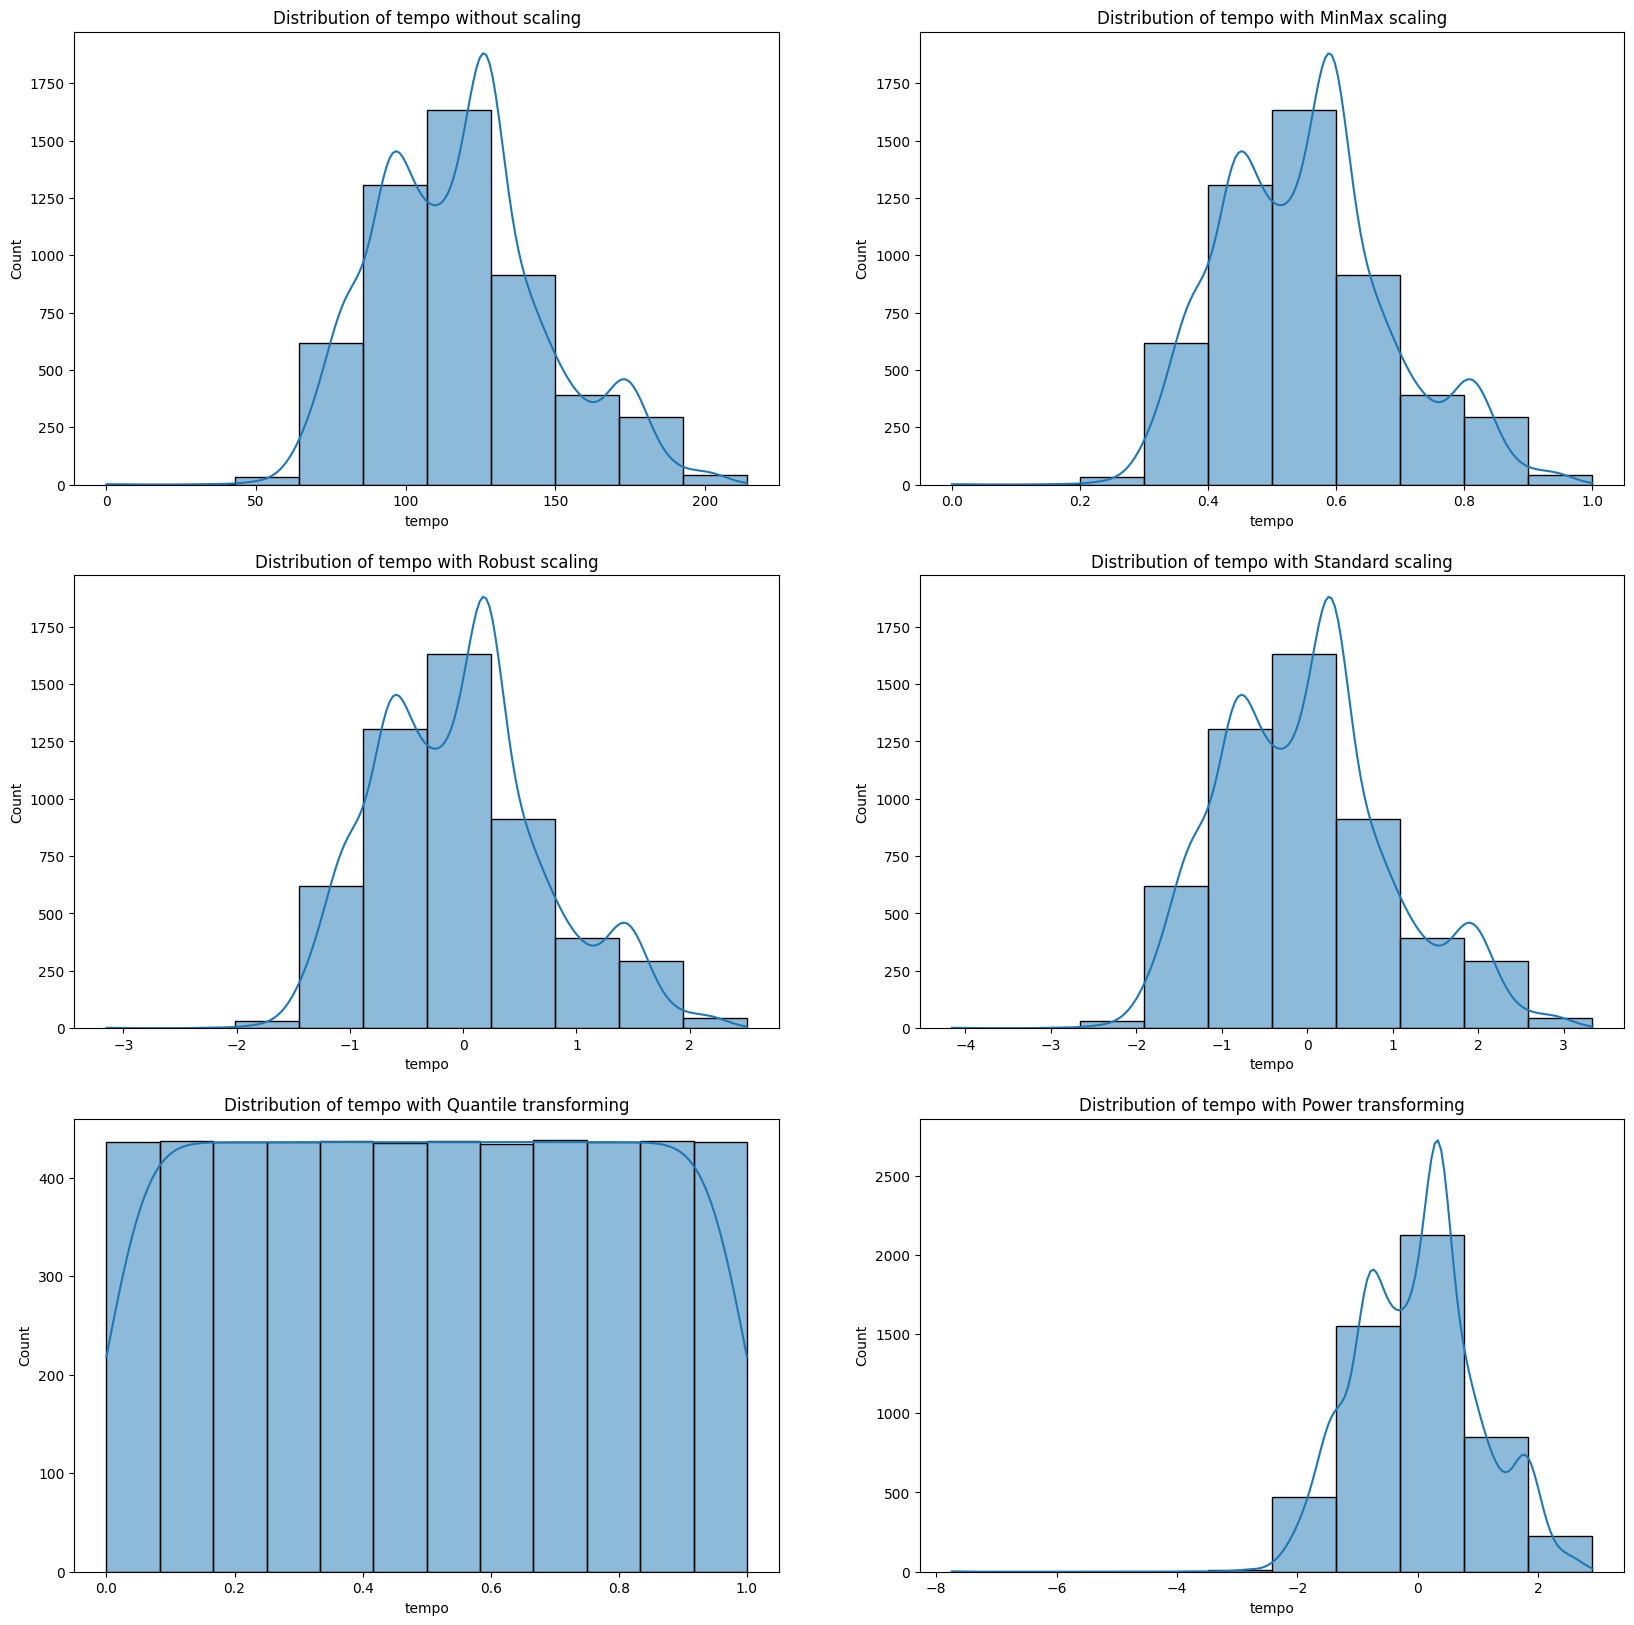

In [11]:
# Histograms
column_name = 'tempo'
# choose feature here
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data=songs_df.loc[:,column_name], bins=10, kde=True, ax=ax[0, 0]);
sns.histplot(data=songs_minmax.loc[:,column_name], bins=10, kde=True, ax=ax[0, 1]);
sns.histplot(data=songs_standard.loc[:,column_name], bins=10, kde=True, ax=ax[1, 1]);
sns.histplot(data=songs_robust.loc[:,column_name], bins=10, kde=True, ax=ax[1, 0]);
sns.histplot(data=songs_quantile.loc[:,column_name], bins=12, kde=True, ax=ax[2, 0]);
sns.histplot(data=songs_power.loc[:,column_name], bins=10, kde=True, ax=ax[2, 1]);

ax[0, 0].set_title(f'Distribution of {column_name} without scaling')
ax[0, 1].set_title(f'Distribution of {column_name} with MinMax scaling')
ax[1, 0].set_title(f'Distribution of {column_name} with Robust scaling')
ax[1, 1].set_title(f'Distribution of {column_name} with Standard scaling')
ax[2, 0].set_title(f'Distribution of {column_name} with Quantile transforming')
ax[2, 1].set_title(f'Distribution of {column_name} with Power transforming')

plt.show()

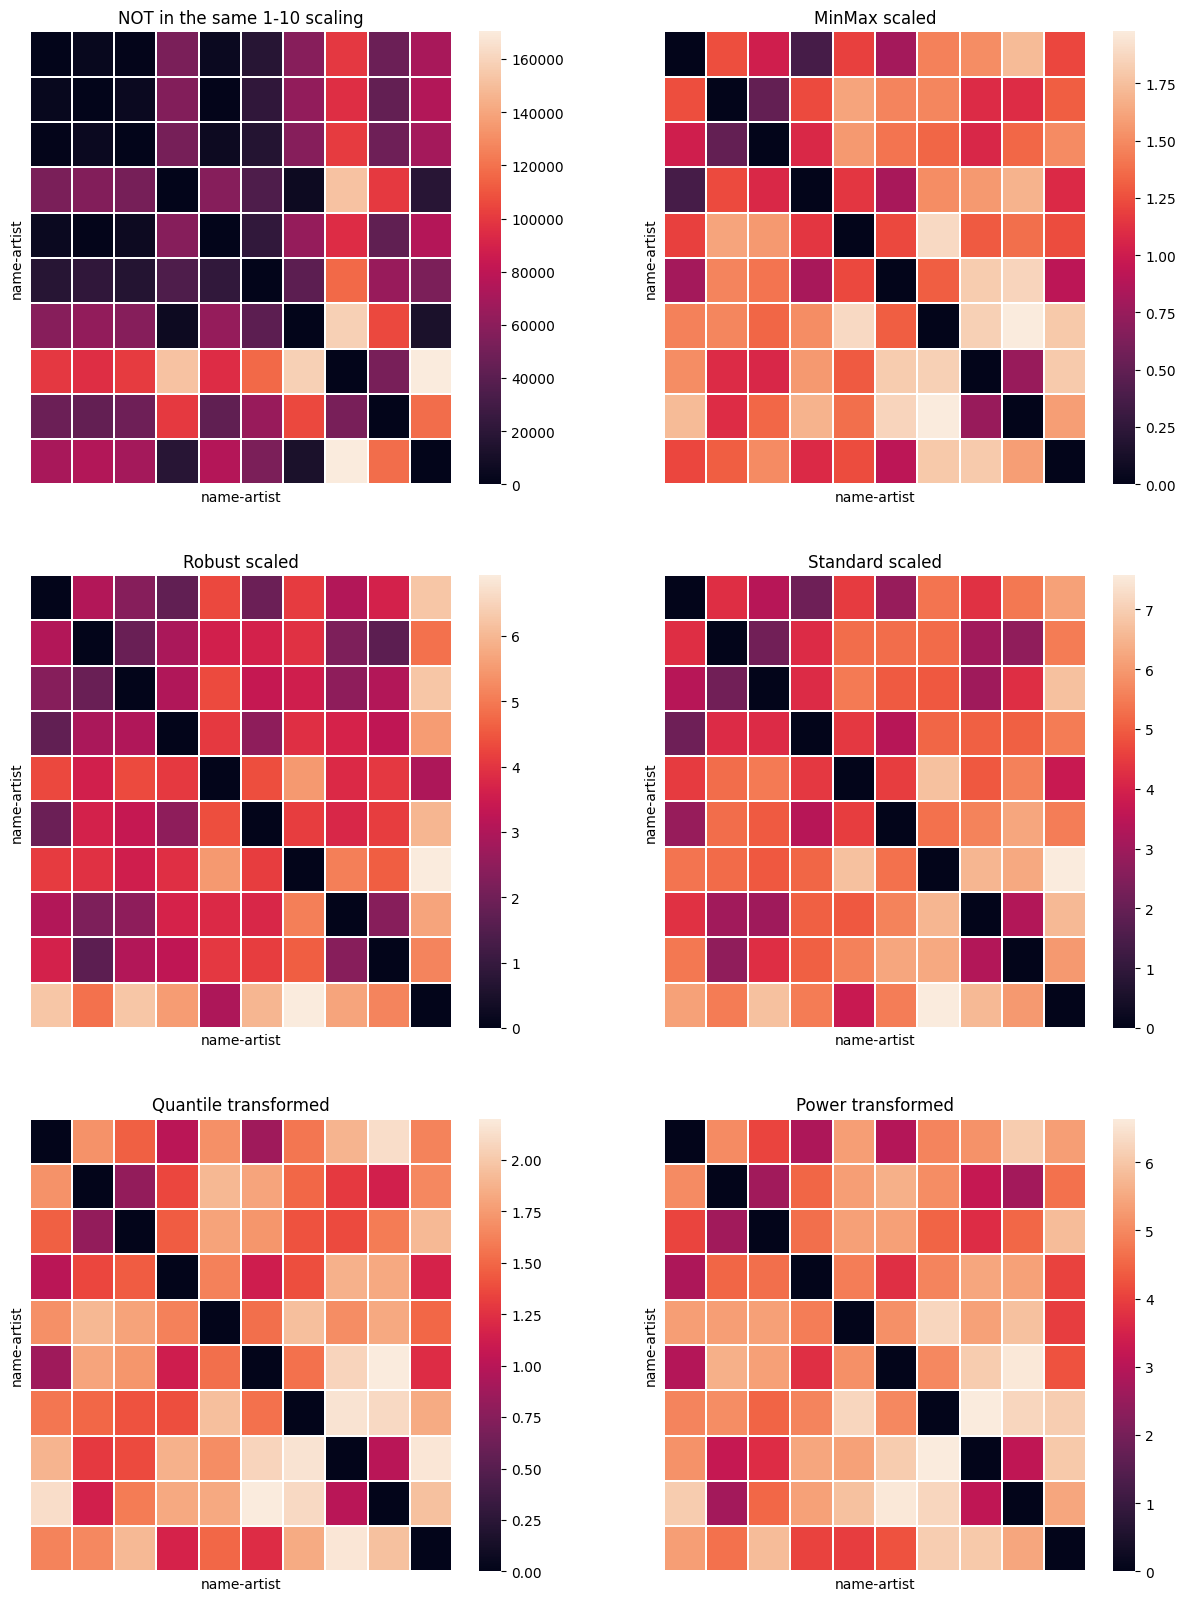

In [12]:
# Heatmans (only do with 10 sampled songs)
import random

samples = random.sample(range(0, 5001), 10)
fig, ax = plt.subplots(3, 2, figsize=(15, 20))

sns.heatmap(songs_distances.iloc[samples, samples], ax=ax[0, 0], linewidths=.2);
sns.heatmap(songs_minmax_distances.iloc[samples, samples], ax=ax[0, 1], linewidths=.2);
sns.heatmap(songs_robust_distances.iloc[samples, samples], ax=ax[1, 0], linewidths=.2);
sns.heatmap(songs_standard_distances.iloc[samples, samples], ax=ax[1, 1], linewidths=.2);
sns.heatmap(songs_quantile_distances.iloc[samples, samples], ax=ax[2, 0], linewidths=.2);
sns.heatmap(songs_power_distances.iloc[samples, samples], ax=ax[2, 1], linewidths=.2);

for a in ax.flat:
    a.set_xticks([])
    a.set_yticks([])

ax[0, 0].set_title('NOT in the same 1-10 scaling')
ax[0, 1].set_title('MinMax scaled')
ax[1, 0].set_title('Robust scaled')
ax[1, 1].set_title('Standard scaled')
ax[2, 0].set_title('Quantile transformed')
ax[2, 1].set_title('Power transformed');


---
# Dimensionality reduction with PCA

Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.

In [15]:
# Create a PCA object with {elbow} principal components
scaled_features_df = songs_minmax.copy()
pca = PCA() #n_components = elbow + 1

# Fit the PCA object to the scaled features dataframe and transform it
pca_df = pca.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.094419,-0.757884,0.504083,0.438636,-0.257086,0.554242,0.560851,0.197453,-0.102738,0.022729,-0.013079,0.005804,-0.006255
Saudade De Bahia,Antônio Carlos Jobim,-0.017481,0.453019,0.384560,-0.225555,0.082847,-0.174383,0.038690,0.109702,-0.174917,0.011962,-0.017243,-0.015519,-0.011982
"Canta Canta, Minha Gente",Martinho Da Vila,-0.126719,0.504107,0.471724,-0.230476,0.276667,-0.007994,0.037417,-0.139534,0.165436,-0.016899,0.289205,-0.069875,-0.010251
Mulher Eu Sei,Chico César,0.505367,0.184282,0.811681,-0.006984,-0.074671,0.106656,0.223721,0.101924,-0.086820,0.029381,0.008400,-0.013775,-0.021077
Rosa Morena,Kurt Elling,0.542908,0.131782,0.744387,0.172948,-0.151485,-0.082936,0.009560,0.093759,0.027305,0.032008,-0.005094,-0.063066,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.177483,-0.113871,0.123871,-0.106151,-0.116104,-0.081500,0.002337,-0.068789,-0.079293,0.077375,0.018366,-0.012382,0.173650
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.974406,-0.069205,0.211216,0.173331,-0.305723,-0.099305,-0.023697,-0.105861,-0.101755,0.077026,0.011342,-0.012386,0.137500
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.400419,-0.327087,-0.021031,0.424738,0.000413,-0.089724,-0.013262,-0.144308,-0.239323,-0.108310,0.059216,-0.248719,-0.038534


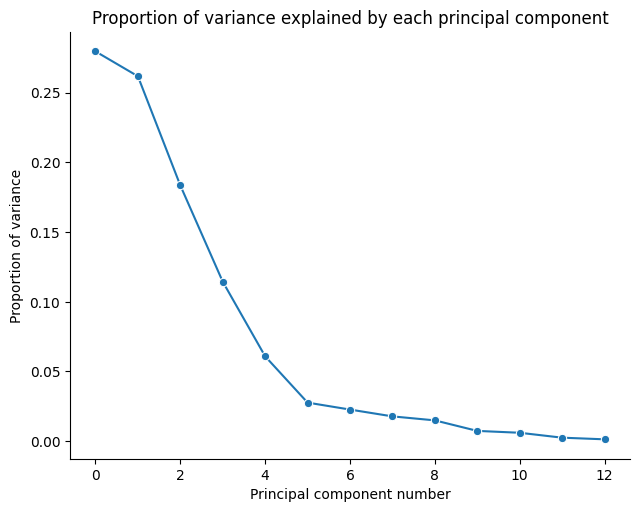

In [20]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array = pca.explained_variance_ratio_
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

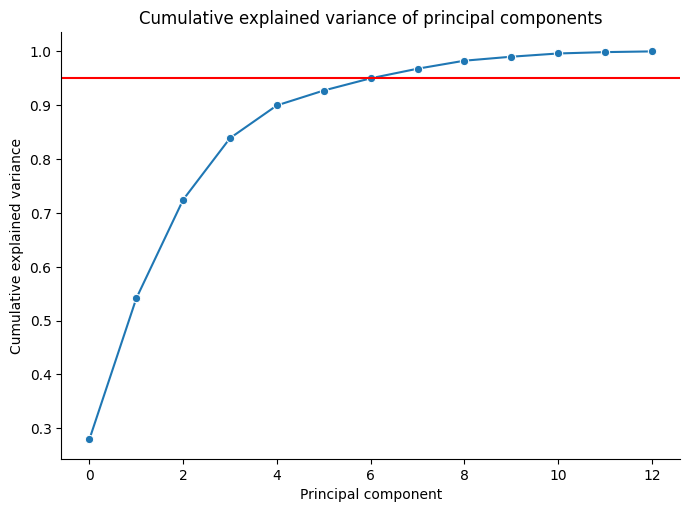

In [ ]:
explained_variance_array = pca.explained_variance_ratio_
cumulative_sum_of_variance = np.cumsum(explained_variance_array)
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

Happy with the first 7 PC that explain over 95% of the variance, only keep those

In [21]:
# Create a PCA object with {elbow} principal components
scaled_features_df = songs_minmax.copy()
pca = PCA(n_components=0.95)

# Fit the PCA object to the scaled features dataframe and transform it
pca_df = pca.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.094419,-0.757884,0.504083,0.438636,-0.257086,0.554242,0.560851
Saudade De Bahia,Antônio Carlos Jobim,-0.017481,0.453019,0.384560,-0.225555,0.082847,-0.174383,0.038690
"Canta Canta, Minha Gente",Martinho Da Vila,-0.126719,0.504107,0.471724,-0.230476,0.276667,-0.007994,0.037417
Mulher Eu Sei,Chico César,0.505367,0.184282,0.811681,-0.006984,-0.074671,0.106656,0.223721
Rosa Morena,Kurt Elling,0.542908,0.131782,0.744387,0.172948,-0.151485,-0.082936,0.009560
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,1.177483,-0.113871,0.123871,-0.106151,-0.116104,-0.081500,0.002337
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.974406,-0.069205,0.211216,0.173331,-0.305723,-0.099305,-0.023697
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.400419,-0.327087,-0.021031,0.424738,0.000413,-0.089724,-0.013262


---
# Try numbers of clusters
Each playlist should have between 50 and 250 songs. For a dataset with roughly 5000 songs, that means between 20 and 100 clusters.

In [ ]:
# your data here
scaled_audio_features = pca_df.copy()

#----
inertia_list = []
n_cluster_list = []
silhouette_list = []
songs_Labels_list = []
cluster_centers_list = []
min_count = []
max_count = []
mean_count = []

max_k = 100
for i in range(2,max_k+1 ):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(scaled_audio_features)
    n_cluster_list.append(i)
    inertia_list.append(round(myKMeans.inertia_))
    silhouette_list.append(silhouette_score(scaled_audio_features, myKMeans.labels_)) # not yet working, all values zero! Check-up
    unique, counts = np.unique(myKMeans.labels_, return_counts=True)

    # Compute statistics
    min_count.append(counts.min())
    max_count.append(counts.max())
    mean_count.append(counts.mean())
    songs_Labels_list.append(myKMeans.labels_)
    cluster_centers_list.append(myKMeans.cluster_centers_)

clusters_df = pd.DataFrame({'n_clusters':n_cluster_list, 
                            'inertia':inertia_list, 
                            'silhouette':silhouette_list, 
                            'min':min_count,
                            'max':max_count,
                            'mean':mean_count,
                            'labels':songs_Labels_list,
                            'centroids':cluster_centers_list})
clusters_df

In [ ]:
clusters_df.plot(x='n_clusters', y='inertia');

In [ ]:
# from example with sns
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(data=clusters_df,
            y = 'inertia',
            x = 'n_clusters',
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 2 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
clusters_df.plot(x='n_clusters', y='silhouette');

In [ ]:
# plot avg number of songs/playlist, as well as min/max
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(data=clusters_df,
            y = 'in',
            x = 'n_clusters',
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"NUmber of songsper playlist from 2 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

---
# Evaluate Clusters

In [ ]:
# COINTINUE HERE!
#  Attach the cluster output to our original DataFrame
scaled_features_df["cluster"] = clusters
scaled_features_df.groupby(by="cluster").mean()

---
# Suggestions beyond the algorithm
* include songs liked by user
* include popular songs
* -> songs could be in more than one playlist
* include curated lists!!!
Either spotify API or kaggle dataset